# Would Ricciardo Have Beaten Verstappen on Merit During the Italian GP?

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.collections import LineCollection
%matplotlib inline

In [3]:
# Enable the cache
ff1.Cache.enable_cache('./cache')

In [4]:
# Load the session data
year, grand_prix, session = 2021, 'Monza', 'R' # could range from “FP1” to “Q” and “R”

In [5]:
race_monza = ff1.get_session(year, grand_prix, session)
race_monza.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	No cached data found for position_data. Loading data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for weather_data. Loading data...
api            INFO 	Fetching weather data...
api 

In [6]:
race_monza.event

RoundNumber                                                    14
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 HEINEKEN GRAN PREMIO D’ITALIA 2021
EventDate                                     2021-09-12 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                                sprint
Session1                                               Practice 1
Session1Date                                  2021-09-10 00:00:00
Session2                                               Qualifying
Session2Date                                  2021-09-10 00:00:00
Session3                                               Practice 2
Session3Date                                  2021-09-11 00:00:00
Session4                                        Sprint Qualifying
Session4Date                                  2021-09-11 00:00:00
Session5  

In [10]:
ric = race_monza.laps.pick_driver('RIC')
ver = race_monza.laps.pick_driver('VER')

In [11]:
ric.info()

<class 'fastf1.core.Laps'>
Int64Index: 53 entries, 0 to 52
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                53 non-null     timedelta64[ns]
 1   DriverNumber        53 non-null     object         
 2   LapTime             48 non-null     timedelta64[ns]
 3   LapNumber           53 non-null     float64        
 4   PitOutTime          2 non-null      timedelta64[ns]
 5   PitInTime           1 non-null      timedelta64[ns]
 6   Sector1Time         52 non-null     timedelta64[ns]
 7   Sector2Time         53 non-null     timedelta64[ns]
 8   Sector3Time         53 non-null     timedelta64[ns]
 9   Sector1SessionTime  52 non-null     timedelta64[ns]
 10  Sector2SessionTime  53 non-null     timedelta64[ns]
 11  Sector3SessionTime  53 non-null     timedelta64[ns]
 12  SpeedI1             39 non-null     float64        
 13  SpeedI2             53 non-null     float64     

In [12]:
ver.info()

<class 'fastf1.core.Laps'>
Int64Index: 25 entries, 861 to 885
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                25 non-null     timedelta64[ns]
 1   DriverNumber        25 non-null     object         
 2   LapTime             24 non-null     timedelta64[ns]
 3   LapNumber           25 non-null     float64        
 4   PitOutTime          2 non-null      timedelta64[ns]
 5   PitInTime           1 non-null      timedelta64[ns]
 6   Sector1Time         24 non-null     timedelta64[ns]
 7   Sector2Time         25 non-null     timedelta64[ns]
 8   Sector3Time         25 non-null     timedelta64[ns]
 9   Sector1SessionTime  24 non-null     timedelta64[ns]
 10  Sector2SessionTime  25 non-null     timedelta64[ns]
 11  Sector3SessionTime  25 non-null     timedelta64[ns]
 12  SpeedI1             19 non-null     float64        
 13  SpeedI2             25 non-null     float64  

In [13]:
ff1.plotting.setup_mpl(mpl_timedelta_support=True)

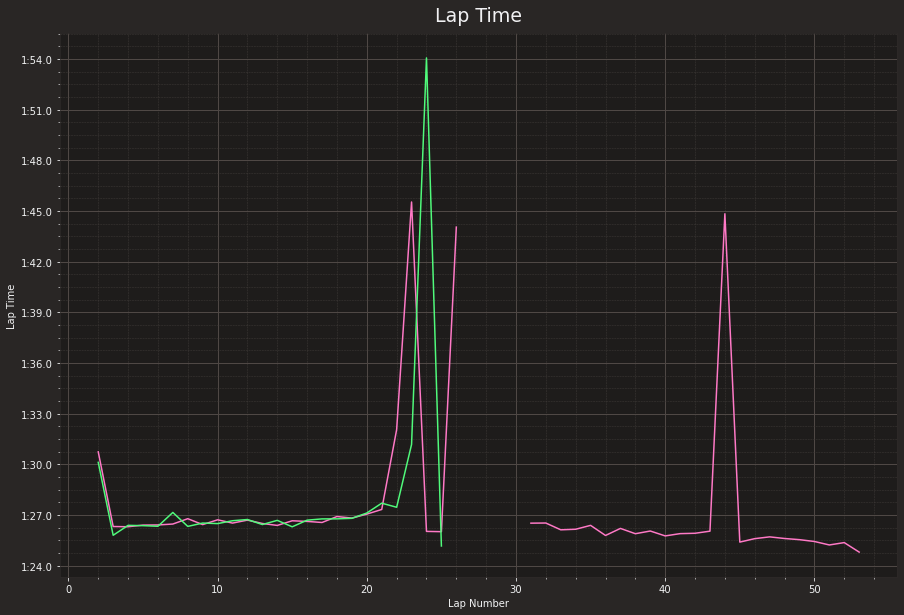

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(ric['LapNumber'], ric['LapTime'], label='RIC')
ax.plot(ver['LapNumber'], ver['LapTime'], label='VER')

ax.set_title("Lap Time")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.show()

In [15]:
# We are only analyzing stint 1, so select that one
laps_ric = laps_ric.loc[laps_ric['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]

NameError: name 'laps_ric' is not defined